In [99]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [100]:
iris=datasets.load_iris()
x=iris.data[:,[1,3]]
y=iris.target

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,stratify=y)

In [102]:
s=StandardScaler()
s.fit(x_train)
x_train_std = s.transform(x_train)
x_test_std = s.transform(x_test)

In [103]:
model=tf.keras.models.Sequential([
    tf.keras.Input(shape=[2]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train_std, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 9ms/step - loss: 1.1155 - accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 0s/step - loss: 1.0745 - accuracy: 0.3733
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 1.0420 - accuracy: 0.5200
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 1.0115 - accuracy: 0.5333
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 0.9845 - accuracy: 0.5333
Epoch 6/100
3/3 [==============================] - 0s 1ms/step - loss: 0.9578 - accuracy: 0.5333
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9329 - accuracy: 0.5333
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 0.9076 - accuracy: 0.5333
Epoch 9/100
3/3 [==============================] - 0s 9ms/step - loss: 0.8831 - accuracy: 0.5333
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8575 - accuracy: 0.6800
Epoch 11/100
3/3 [============

5172/5172 [==============================] - 5s 1ms/step


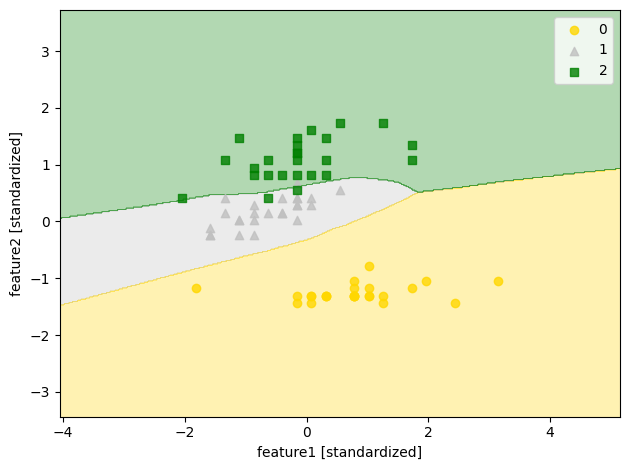

In [104]:
def plot_decision_regions(x, y, classifier, resolution=0.02):

    marker = ('o', '^', 's', 'x')
    color = ('gold', 'silver', 'green', 'red')
    color_map = ListedColormap(color[:len(np.unique(y))])
    x1_min=x[:, 0].min()-2 
    x1_max=x[:, 0].max()+2
    x2_min=x[:, 1].min()-2
    x2_max=x[:, 1].max()+2
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = np.argmax(classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T),axis=1)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=color_map)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, Class in enumerate(np.unique(y)):
        plt.scatter(x=x[y==Class,0],y=x[y== Class,1],alpha=0.8,marker=marker[idx],c=color[idx],label=Class)

plot_decision_regions(x_train_std, y_train, classifier=model)
plt.xlabel('feature1 [standardized]')
plt.ylabel('feature2 [standardized]')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()